<a href="https://colab.research.google.com/github/davidanagy/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












## Part 1

In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

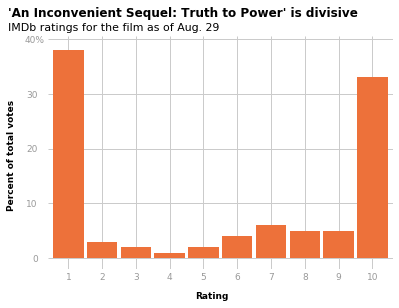

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], index=range(1,11))

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(5.5, 4)) # Changed the figure size.
fig.patch.set(facecolor='white')

ax = fake.plot.bar(color='#ED713A', width=0.9)
ax.set(facecolor='white')

ax.text(x=-1.8, y=44, s="'An Inconvenient Sequel: Truth to Power' is divisive", fontweight='bold', fontsize=12)
ax.text(x=-1.8, y=41.5, s='IMDb ratings for the film as of Aug. 29', fontsize=11)

ax.set_ylabel('Percent of total votes', y=0.49, fontsize=9, fontweight='bold', labelpad=10) # Changed the location a bit.
ax.set_xlabel('Rating', x=0.475, fontsize=9, fontweight='bold', labelpad=10) # Changed the location a bit.

ax.set_xticklabels(range(1,11), rotation=0,)
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(range(0,40,10), x=-0.02)
ax.text(x=-1.3, y=39.3, s='40%', color='#999999', fontsize=9)
# Did it this way so I could get the last y-label to be "40%" while still aligning the labels correctly.
# Unfortunately the positioning is a bit off because my font for the '%' is different from 538's, but I don't know which font they're using.

# Remove the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

# Extend the grid below y=0 and above y=40
plt.ylim(-2, 40.5)
# Make the horizontal ticks extend past the bars at about the same length as in the 538 graph.
plt.xlim(-0.6, 9.6)

# Make the ticks have the right color.
ax.tick_params(labelcolor='#999999', labelsize=9)

plt.show()

I'm fairly satisfied with this. The only thing that's really off is that the title and subtitle are "shorter" than in the 538 graphic, but putting in the 'fontstretch' parameter didn't seem to do anything, so I can't see a way to change that.

In [3]:
display(example)

## Part 2

I'm using this graph: https://fivethirtyeight.com/wp-content/uploads/2019/07/choi-foul-0625-2-1.png?w=575

In [4]:
from IPython.display import display, Image

url2 = 'https://fivethirtyeight.com/wp-content/uploads/2019/07/choi-foul-0625-2-1.png?w=575'
example2 = Image(url=url2, width=400)

display(example2)

In [5]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/foul-balls/foul-balls.csv')

print(df.shape)
df.head()

(906, 7)


,matchup,game_date,type_of_hit,exit_velocity,predicted_zone,camera_zone,used_zone
0,Seattle Mariners VS Minnesota Twins,2019-05-18,Ground,NaN,1,1.0,1
1,Seattle Mariners VS Minnesota Twins,2019-05-18,Fly,NaN,4,NaN,4
2,Seattle Mariners VS Minnesota Twins,2019-05-18,Fly,56.9,4,NaN,4
3,Seattle Mariners VS Minnesota Twins,2019-05-18,Fly,78.8,1,1.0,1
4,Seattle Mariners VS Minnesota Twins,2019-05-18,Fly,NaN,2,NaN,2


In [6]:
# Dropping unnecessary columns.

fouls = df.drop(['matchup', 'game_date', 'type_of_hit', 'predicted_zone', 'camera_zone'], axis=1)
fouls.head()

,exit_velocity,used_zone
0,NaN,1
1,NaN,4
2,56.9,4
3,78.8,1
4,NaN,2


In [7]:
# Now I need to split the dataset into three: velocity <90, velocity >= 90, and NaN.

condition1 = (fouls['exit_velocity'] < 90)
condition2 = (fouls['exit_velocity'] >= 90)
condition3 = (fouls['exit_velocity'].isnull())

slow = fouls.loc[condition1, ['exit_velocity', 'used_zone']]
fast = fouls.loc[condition2, ['exit_velocity', 'used_zone']]
unknown = fouls.loc[condition3, ['exit_velocity', 'used_zone']]

print(slow.head())
print(fast.head())
print(unknown.head())

   exit_velocity  used_zone
2           56.9          4
3           78.8          1
6           74.8          2
8           70.7          4
9           73.4          4
    exit_velocity  used_zone
14           95.9          5
25          104.6          6
26           96.2          4
38          100.8          5
56           92.1          5
   exit_velocity  used_zone
0            NaN          1
1            NaN          4
4            NaN          2
5            NaN          1
7            NaN          1


In [8]:
# Now I can finally get the data I need.

data_slow = slow['used_zone'].value_counts().reset_index()
data_slow = data_slow.rename(columns={'index': 'used_zone', 'used_zone': 'frequency'})

data_fast = fast['used_zone'].value_counts().reset_index()
data_fast = data_fast.rename(columns={'index': 'used_zone', 'used_zone': 'frequency'})

data_unknown = unknown['used_zone'].value_counts().reset_index()
data_unknown = data_unknown.rename(columns={'index': 'used_zone', 'used_zone': 'frequency'})

data_slow.head()

,used_zone,frequency
0,1,152
1,4,129
2,5,122
3,2,53
4,3,50


In [0]:
# I did research on stacked bar graphs and found this article: https://pstblog.com/2016/10/04/stacked-charts
# To get the proper pivot table, I need to add a column that labels each dataframe and then concatenate them all together.

data_slow['Type'] = 'Slow'
data_slow = data_slow.rename(columns={'Type': 'type'})
data_slow.head()
data_fast['type'] = 'Fast'
data_unknown['type'] = 'Unknown'

In [13]:
# Now to concatenate!

final = pd.concat([data_slow, data_fast, data_unknown])
final

,used_zone,frequency,type
0,1,152,Slow
1,4,129,Slow
2,5,122,Slow
3,2,53,Slow
4,3,50,Slow
0,5,36,Fast
1,4,26,Fast
2,6,6,Fast
3,7,5,Fast
4,1,1,Fast


In [16]:
# And now, finally, to pivot table! (I also re-order the columns to get the same order as the 538 graph.)

data = final.pivot(index='used_zone', columns='type', values='frequency')
data = data[['Slow', 'Fast', 'Unknown']]
data

type,Slow,Fast,Unknown
used_zone,,,
1,152.0,1.0,125.0
2,53.0,NaN,43.0
3,50.0,NaN,30.0
4,129.0,26.0,60.0
5,122.0,36.0,68.0
6,NaN,6.0,NaN
7,NaN,5.0,NaN


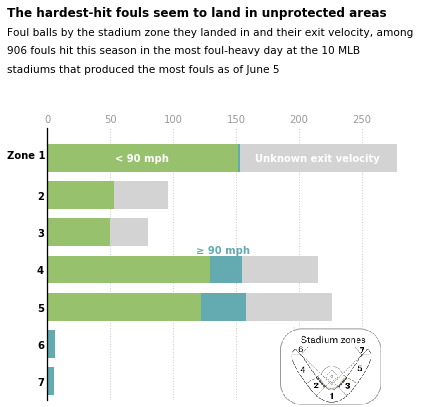

In [167]:
# And now, to graph!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

fig.set_size_inches(6,5)

data.plot.barh(stacked=True, color=['#97C16D', '#63ABB0', '#D3D3D3'], width=0.75, ax=ax)
ax.set(facecolor='white')

ax.set_xlim(0,299)
ax.set_ylim(6.5, -0.8)

ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.3)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.text(x=-32, y=-3.8, s='The hardest-hit fouls seem to land in unprotected areas', fontweight='bold', fontsize=12)
ax.text(x=-32, y=-3.3, s='Foul balls by the stadium zone they landed in and their exit velocity, among', fontsize=10.5)
ax.text(x=-32, y=-2.8, s='906 fouls hit this season in the most foul-heavy day at the 10 MLB', fontsize=10.5)
ax.text(x=-32, y=-2.3, s='stadiums that produced the most fouls as of June 5', fontsize=10.5)

ax.text(x=54, y=0.1, s='< 90 mph', color='white', fontweight='bold')
ax.text(x=165, y=0.1, s='Unknown exit velocity', fontweight='bold', color='white')
ax.text(x=118, y=2.55, s='\u2265 90 mph', color='#63ABB0', fontweight='bold')

ax.set_yticklabels(['',2,3,4,5,6,7], fontweight='bold')
ax.text(x=-32, y=0, s='Zone 1', fontweight='bold', fontsize=10)

ax.set_xticklabels([0,50,100,150,200,250], color='#999999')

ax.xaxis.tick_top()

ax.set_ylabel('')

ax.grid(axis='y', visible=False)
ax.grid(axis='x', linestyle='dotted')

ax.get_legend().remove()

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

img = mpimg.imread('mlb-zones.png')
imagebox = OffsetImage(img, zoom=0.7)
ab = AnnotationBbox(imagebox, (225, 5.6), frameon=False)
ax.add_artist(ab)

plt.show()

In [39]:
display(example2)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here